<a href="https://colab.research.google.com/github/ARPITA2009/Maa-Durga/blob/main/Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.8.0
/device:GPU:0
Num GPUs Available:  1


In [2]:
cd /content

/content


In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soumiarpita","key":"c52433e2f3102b5294f705722baf9269"}'}

In [6]:
! chmod 600 kaggle.json

In [7]:
cd /root

/root


In [8]:
mkdir .kaggle

In [9]:
cd .kaggle

/root/.kaggle


In [10]:
cp /content/kaggle.json .

In [11]:
! kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.09G/3.10G [00:22<00:00, 240MB/s]
100% 3.10G/3.10G [00:22<00:00, 146MB/s]


In [12]:
cp breast-histopathology-images.zip /content

In [13]:
cd /content

/content


In [14]:
ll

total 3248864
-rw-r--r-- 1 root 3326820824 Mar 12 05:32 breast-histopathology-images.zip
-rw------- 1 root         67 Mar 12 05:32 kaggle.json
drwxr-xr-x 1 root       4096 Mar  9 14:48 sample_data/


In [15]:
!unzip \*.zip 

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [16]:
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt

In [17]:
mypaths=[]
for name in glob('/content/IDC_regular_ps50_idx5/*',recursive=True):
    mypaths.append(name)
print(mypaths[:5])

['/content/IDC_regular_ps50_idx5/14155', '/content/IDC_regular_ps50_idx5/12869', '/content/IDC_regular_ps50_idx5/12955', '/content/IDC_regular_ps50_idx5/12930', '/content/IDC_regular_ps50_idx5/9320']


In [18]:
mp=mypaths[60:120]
imagePatches=[]
for i in mp:
    imagePatches+=glob(i+'/*/*.png', recursive=True)

In [19]:
print('total no. of images selected from total images is '+str(len(imagePatches)))
#imagePatches[60:90]

total no. of images selected from total images is 66227


In [20]:
class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

In [21]:
print('Among them, '+str(len(class0))+' is clss0 and '+str(len(class1))+' is class1')

Among them, 47077 is clss0 and 19150 is class1


In [22]:
sampled_class0 = random.sample(class0, len(class1))
sampled_class1 = random.sample(class1, len(class1))
len(sampled_class0)

19150

In [24]:
from matplotlib.image import imread
import cv2

def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
      if i.endswith('.png'):
        img = cv2.imread(i ,cv2.IMREAD_COLOR)
        img_sized = cv2.resize(img, (50, 50), interpolation=cv2.INTER_LINEAR)
        img_re=img_sized/255.0
        img_arrays.append([img_re, label])
    return img_arrays

In [25]:
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)
print('done')

done


In [26]:
print(len(class0_array))
print(len(class1_array))

19150
19150


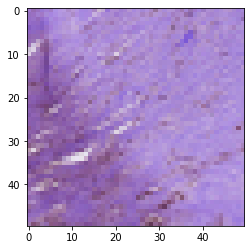

In [27]:
plt.imshow(class1_array[10][0])

In [28]:
combined_data = np.concatenate((class0_array, class1_array))
#random.seed(41)
#random.shuffle(combined_data)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [29]:
X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)

In [30]:
X = np.array(X).reshape(-1, 50, 50, 3)

In [31]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28725, 50, 50, 3) (9575, 50, 50, 3) (28725, 2) (9575, 2)


In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
def ensemble_loss(y_true,y_test):
  bce = keras.losses.BinaryCrossentropy()
  mae = keras.losses.MeanAbsoluteError()
  h = keras.losses.Hinge()
  p = keras.losses.Poisson()
  loss_fn1 = bce(y_true,y_test)
  loss_fn2 = mae(y_true,y_test)
  loss_fn3 = h(y_true,y_test)
  loss_fn4 = p(y_true,y_test)
  loss= 0.7*loss_fn1 + 0.15*loss_fn3 + 0.15*loss_fn2
  return loss

In [39]:
from keras.applications.densenet import DenseNet201
densenet_model= DenseNet201(include_top=True, weights='imagenet',input_shape=None)
print("Number of layers in the base model: ", len(densenet_model.layers))
densenet_model.trainable = True
fine_tune_at = 500
# Freeze all the layers before the `fine_tune_at` layer
for layer in densenet_model.layers[:fine_tune_at]:
  layer.trainable = False


Number of layers in the base model:  709


In [40]:
pip install -q -U keras-tuner

     |████████████████████████████████| 98 kB 3.1 MB/s 
